In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
import folium
from folium.plugins import HeatMap, HeatMapWithTime

In [3]:
import math
import datetime as dt

In [4]:
df = pd.read_csv("G:/Education/Machine Learning/ML_DATA_FILES/Un_Employment_EU_Dataset/Unemployment_Data.tsv", sep = '\t')
df.head()

,"s_adj,age,unit,sex,geo\time",2020M06,2020M05,2020M04,2020M03,2020M02,2020M01,2019M12,2019M11,2019M10,...,1983M10,1983M09,1983M08,1983M07,1983M06,1983M05,1983M04,1983M03,1983M02,1983M01
0,"NSA,TOTAL,PC_ACT,F,AT",6.3,5.6,5.2,4.7,4.1,4.4,4.0,3.9,4.2,...,:,:,:,:,:,:,:,:,:,:
1,"NSA,TOTAL,PC_ACT,F,BE",5.0,5.0,5.2,5.0,4.9,4.8,4.6,4.5,4.7,...,:,:,:,:,:,:,:,:,:,:
2,"NSA,TOTAL,PC_ACT,F,BG",3.9,4.2,4.7,4.1,4.2,4.3,3.9,3.8,3.6,...,:,:,:,:,:,:,:,:,:,:
3,"NSA,TOTAL,PC_ACT,F,CH",:,:,:,4.8,4.5,4.4,4.1,4.0,4.2,...,:,:,:,:,:,:,:,:,:,:
4,"NSA,TOTAL,PC_ACT,F,CY",9.2,8.3,7.9,7.5,7.4,7.6,7.4,7.7,5.8,...,:,:,:,:,:,:,:,:,:,:


In [5]:
df_countries = pd.read_csv("G:/Education/Machine Learning/ML_DATA_FILES/Un_Employment_EU_Dataset/Country_Codes.csv")
df_countries.head()

,English short name lower case,Alpha-2 code,Alpha-3 code,Numeric code,ISO 3166-2
0,Zimbabwe,ZW,ZWE,716,ISO 3166-2:ZW
1,Zambia,ZM,ZMB,894,ISO 3166-2:ZM
2,Yemen,YE,YEM,887,ISO 3166-2:YE
3,Western Sahara,EH,ESH,732,ISO 3166-2:EH
4,Wallis and Futuna,WF,WLF,876,ISO 3166-2:WF


In [6]:
print("df.shape: ", df.shape)
print("df_countries.shape: ", df_countries.shape)

df.shape:  (2131, 451)
df_countries.shape:  (246, 5)


## Replacing Column Names

In [7]:
df_countries.columns = ['country', 'C2', 'C3', 'numeric', 'iso']

## Extracting Data seperately in the tsv dataset

In [8]:
df['C2'] = df['s_adj,age,unit,sex,geo\\time'].apply(lambda x : x.split(",")[-1])
df['s_adj'] = df['s_adj,age,unit,sex,geo\\time'].apply(lambda x : x.split(",")[0])
df['age'] = df['s_adj,age,unit,sex,geo\\time'].apply(lambda x : x.split(",")[1])
df['unit'] = df['s_adj,age,unit,sex,geo\\time'].apply(lambda x : x.split(",")[2])
df['sex'] = df['s_adj,age,unit,sex,geo\\time'].apply(lambda x : x.split(",")[3])

In [9]:
df.head()

,"s_adj,age,unit,sex,geo\time",2020M06,2020M05,2020M04,2020M03,2020M02,2020M01,2019M12,2019M11,2019M10,...,1983M05,1983M04,1983M03,1983M02,1983M01,C2,s_adj,age,unit,sex
0,"NSA,TOTAL,PC_ACT,F,AT",6.3,5.6,5.2,4.7,4.1,4.4,4.0,3.9,4.2,...,:,:,:,:,:,AT,NSA,TOTAL,PC_ACT,F
1,"NSA,TOTAL,PC_ACT,F,BE",5.0,5.0,5.2,5.0,4.9,4.8,4.6,4.5,4.7,...,:,:,:,:,:,BE,NSA,TOTAL,PC_ACT,F
2,"NSA,TOTAL,PC_ACT,F,BG",3.9,4.2,4.7,4.1,4.2,4.3,3.9,3.8,3.6,...,:,:,:,:,:,BG,NSA,TOTAL,PC_ACT,F
3,"NSA,TOTAL,PC_ACT,F,CH",:,:,:,4.8,4.5,4.4,4.1,4.0,4.2,...,:,:,:,:,:,CH,NSA,TOTAL,PC_ACT,F
4,"NSA,TOTAL,PC_ACT,F,CY",9.2,8.3,7.9,7.5,7.4,7.6,7.4,7.7,5.8,...,:,:,:,:,:,CY,NSA,TOTAL,PC_ACT,F


In [10]:
df.sex.unique()

array(['F', 'M', 'T'], dtype=object)

In [11]:
df.C2.unique()

array(['AT', 'BE', 'BG', 'CH', 'CY', 'CZ', 'DE', 'DK', 'EA', 'EA18',
       'EA19', 'EE', 'EL', 'ES', 'EU25', 'EU27_2007', 'EU27_2020', 'EU28',
       'FI', 'FR', 'HR', 'HU', 'IE', 'IS', 'IT', 'JP', 'LT', 'LU', 'LV',
       'MT', 'NL', 'NO', 'PL', 'PT', 'RO', 'SE', 'SI', 'SK', 'UK', 'US',
       'TR'], dtype=object)

In [12]:
df.age.unique()

array(['TOTAL', 'Y25-74', 'Y_LT25'], dtype=object)

## Filtering Columns for Analysis

We select only a part of columns for further analysis.

More specificaly, we are selecting country code (2 letters), age, unit, sex, s_adj and months from Jan 2015 to June 2020

In [13]:
selected_cols = ['C2','age','unit','sex', 's_adj', 
                 '2020M06 ', '2020M05 ', '2020M04 ','2020M03 ','2020M02 ','2020M01 ',
                 '2019M12 ','2019M11 ','2019M10 ','2019M09 ','2019M08 ','2019M07 ',
                 '2019M06 ','2019M05 ','2019M04 ','2019M03 ','2019M02 ','2019M01 ',
                '2018M12 ','2018M11 ','2018M10 ','2018M09 ','2018M08 ','2018M07 ',
                 '2018M06 ','2018M05 ','2018M04 ','2018M03 ','2018M02 ','2018M01 ',
                '2017M12 ','2017M11 ','2017M10 ','2017M09 ','2017M08 ','2017M07 ',
                 '2017M06 ','2017M05 ','2017M04 ','2017M03 ','2017M02 ','2017M01 ',
                '2016M12 ','2016M11 ','2016M10 ','2016M09 ','2016M08 ','2016M07 ',
                 '2016M06 ','2016M05 ','2016M04 ','2016M03 ','2016M02 ','2016M01 ',
                '2015M12 ','2015M11 ','2015M10 ','2015M09 ','2015M08 ','2015M07 ',
                 '2015M06 ','2015M05 ','2015M04 ','2015M03 ','2015M02 ','2015M01 ']

In [14]:
df_data_new = df[selected_cols]

In [15]:
df_data_new = df_data_new.merge(df_countries, on = 'C2')

In [16]:
df_data_new.head()

,C2,age,unit,sex,s_adj,2020M06,2020M05,2020M04,2020M03,2020M02,...,2015M06,2015M05,2015M04,2015M03,2015M02,2015M01,country,C3,numeric,iso
0,AT,TOTAL,PC_ACT,F,NSA,6.3,5.6,5.2,4.7,4.1,...,5.2,5.6,5.4,5.2,5.6,5.2,Austria,AUT,40,ISO 3166-2:AT
1,AT,TOTAL,PC_ACT,M,NSA,6.1,6.3,5.2,5.0,5.5,...,6.0,6.1,6.6,6.6,6.2,6.0,Austria,AUT,40,ISO 3166-2:AT
2,AT,TOTAL,PC_ACT,T,NSA,6.2,6.0,5.2,4.9,4.9,...,5.6,5.8,6.0,5.9,5.9,5.6,Austria,AUT,40,ISO 3166-2:AT
3,AT,TOTAL,THS_PER,F,NSA,136,116,107,97,88,...,106,114,109,105,113,106,Austria,AUT,40,ISO 3166-2:AT
4,AT,TOTAL,THS_PER,M,NSA,146,149,121,118,133,...,141,140,152,151,141,136,Austria,AUT,40,ISO 3166-2:AT


In [17]:
df_data_new.shape

(1645, 75)

## Pivot Time Series data using Melt

In [18]:
df_data_time = df_data_new.melt(id_vars = ['country', 'age', 'unit', 'sex', 's_adj', 'C2', 'C3', 'numeric', 'iso'], var_name = 'Date', value_name = 'Value')

In [19]:
df_data_time.head()

,country,age,unit,sex,s_adj,C2,C3,numeric,iso,Date,Value
0,Austria,TOTAL,PC_ACT,F,NSA,AT,AUT,40,ISO 3166-2:AT,2020M06,6.3
1,Austria,TOTAL,PC_ACT,M,NSA,AT,AUT,40,ISO 3166-2:AT,2020M06,6.1
2,Austria,TOTAL,PC_ACT,T,NSA,AT,AUT,40,ISO 3166-2:AT,2020M06,6.2
3,Austria,TOTAL,THS_PER,F,NSA,AT,AUT,40,ISO 3166-2:AT,2020M06,136
4,Austria,TOTAL,THS_PER,M,NSA,AT,AUT,40,ISO 3166-2:AT,2020M06,146


In [20]:
df_data_time.shape

(108570, 11)

## Cleaning Time Series Data

In [21]:
import re

In [22]:
df_data_time['Value'] = df_data_time['Value'].apply(lambda x : re.sub(r"[a-zA-Z: ]", "", x))
df_data_time['Value'] = df_data_time['Value'].apply(lambda x : x.replace(" ",""))
df_data_time = df_data_time.loc[~(df_data_time.Value == "")]
df_data_time['Value'] = df_data_time['Value'].apply(lambda x : float(x))

In [23]:
print(f"distinct values: {len(list(df_data_time['Value'].unique()))}")
print(f"samples values: {df_data_time['Value'].unique()}")

distinct values: 3919
samples values: [6.300e+00 6.100e+00 6.200e+00 ... 3.346e+03 6.243e+03 3.259e+03]


## Data Visualization

### Age interval btw 25-74

In [24]:
total_y25_74_df = df_data_time.loc[(df_data_time.age == 'Y25-74') & (df_data_time.unit == 'PC_ACT') & (df_data_time.sex == 'T') & (df_data_time.s_adj == 'TC')]

In [25]:
def plot_time_variation(df, y='Value', size=1, is_log=False, title=""):
    f, ax = plt.subplots(1,1, figsize=(4*size,3*size))

    countries = list(df.country.unique())
    for country in countries:
        df_ = df[(df['country']==country)] 
        g = sns.lineplot(x="Date", y=y, data=df_,  label=country)  
        ax.text(max(df_['Date']), (df_.loc[df_['Date']==max(df_['Date']), y]), str(country))
    plt.xticks(rotation=90)
    plt.title(f'Total unemployment, {title}, grouped by country')
    ax.text(max(df_['Date']), (df_.loc[df_['Date']==max(df_['Date']), y]), str(country))
    plt.legend(loc="upper left", bbox_to_anchor=(1,1))
    if(is_log):
        ax.set(yscale="log")
    ax.grid(color='black', linestyle='dotted', linewidth=0.75)
    plt.show()

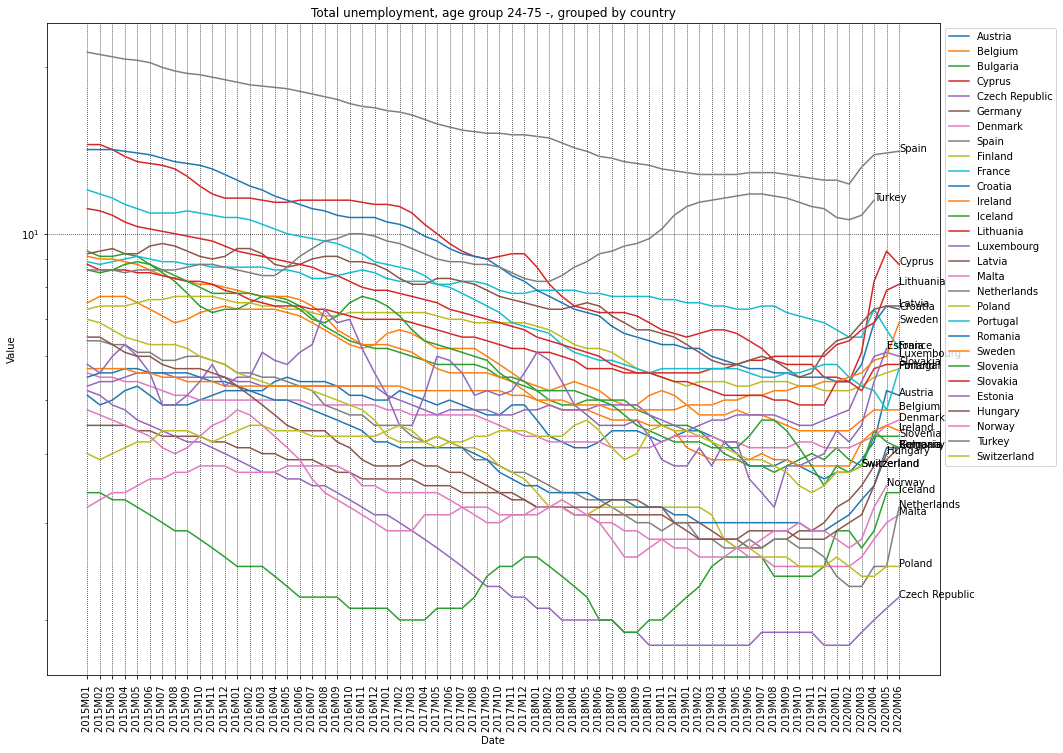

In [26]:
plot_time_variation(total_y25_74_df, size=4, is_log=True, title = "age group 24-75 -")

In [27]:
total_F_y25_74_df = df_data_time.loc[(df_data_time.age=='Y25-74')&(df_data_time.unit=='PC_ACT')&(df_data_time.sex=='F')&(df_data_time.s_adj=='TC')]

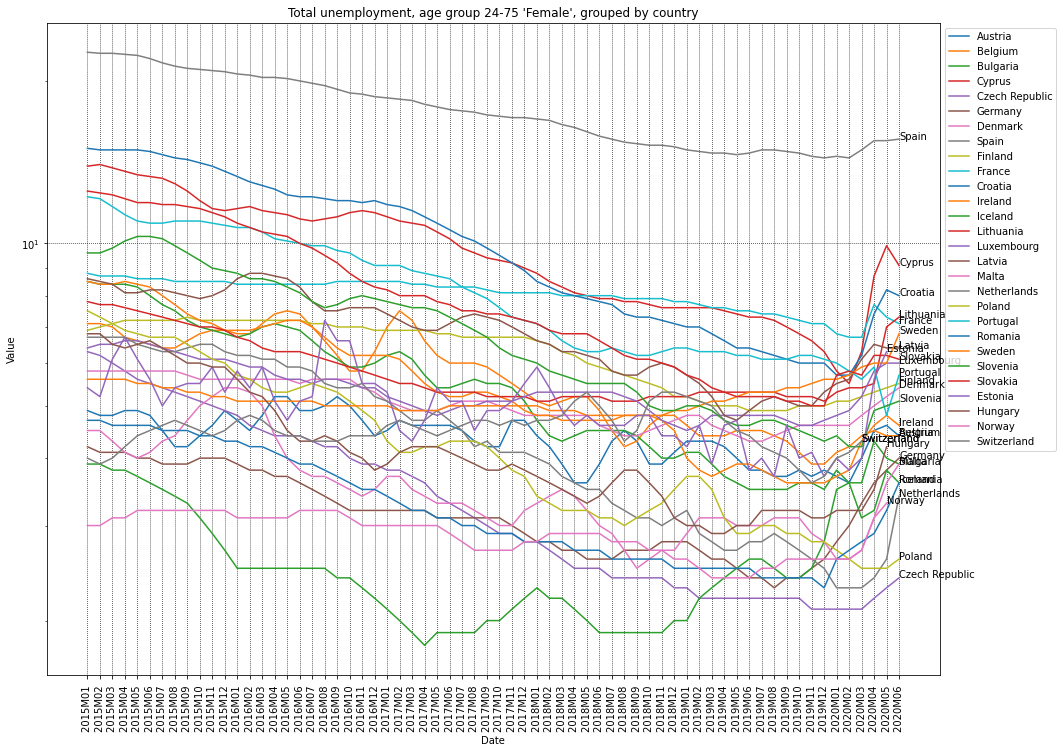

In [28]:
plot_time_variation(total_F_y25_74_df, size=4, is_log=True, title = "age group 24-75 'Female'")

In [29]:
total_M_y25_74_df = df_data_time.loc[(df_data_time.age=='Y25-74')&(df_data_time.unit=='PC_ACT')&(df_data_time.sex=='M')&(df_data_time.s_adj=='TC')]

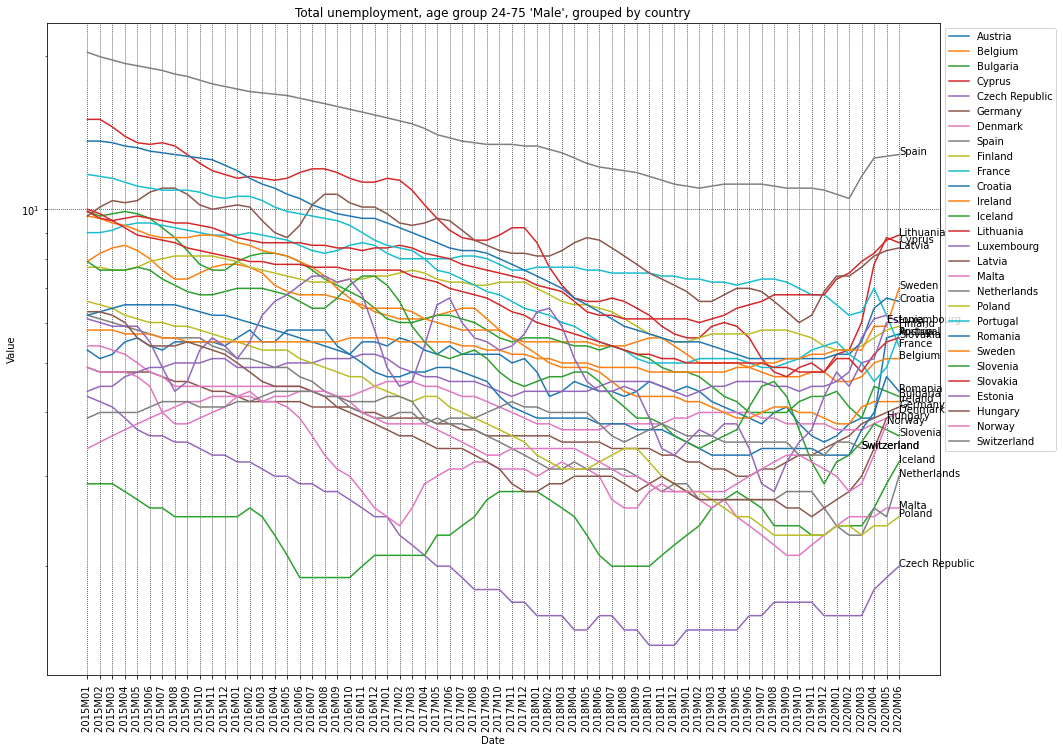

In [30]:
plot_time_variation(total_M_y25_74_df, size=4, is_log=True, title = "age group 24-75 'Male'")

In [31]:
total_M_y25_df = df_data_time.loc[(df_data_time.age=='Y_LT25')&(df_data_time.unit=='PC_ACT')&(df_data_time.sex=='M')&(df_data_time.s_adj=='TC')]

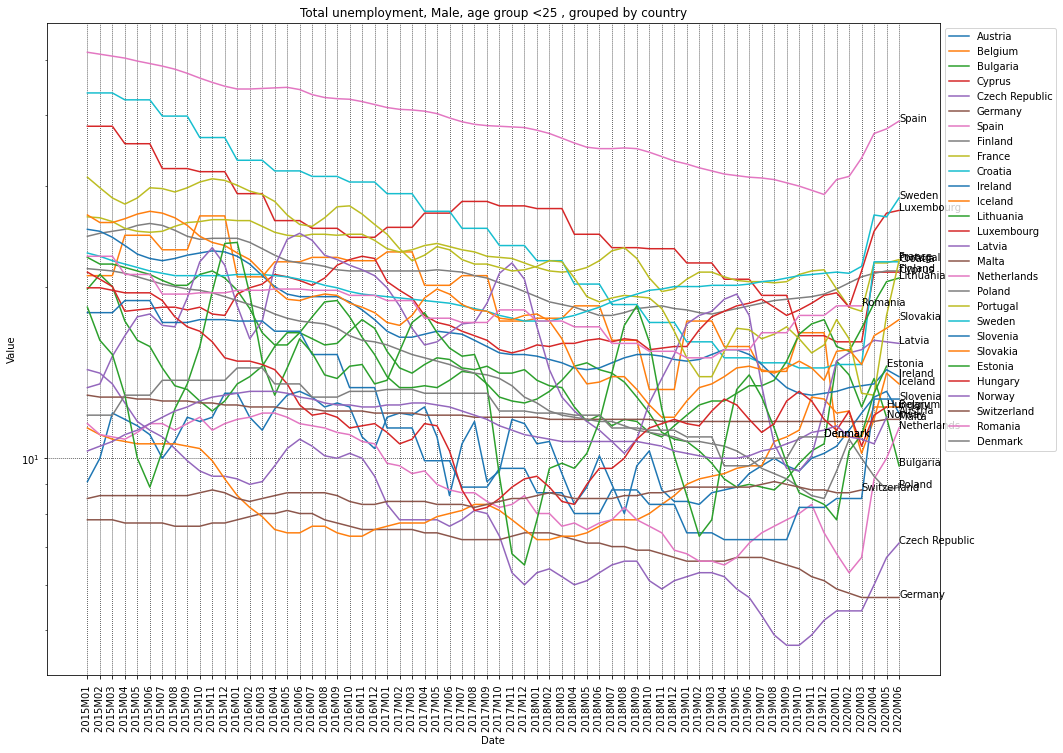

In [32]:
plot_time_variation(total_M_y25_df, size=4, is_log=True, title = "Male, age group <25 ")

In [33]:
total_F_y25_df = df_data_time.loc[(df_data_time.age=='Y_LT25')&(df_data_time.unit=='PC_ACT')&(df_data_time.sex=='F')&(df_data_time.s_adj=='TC')]

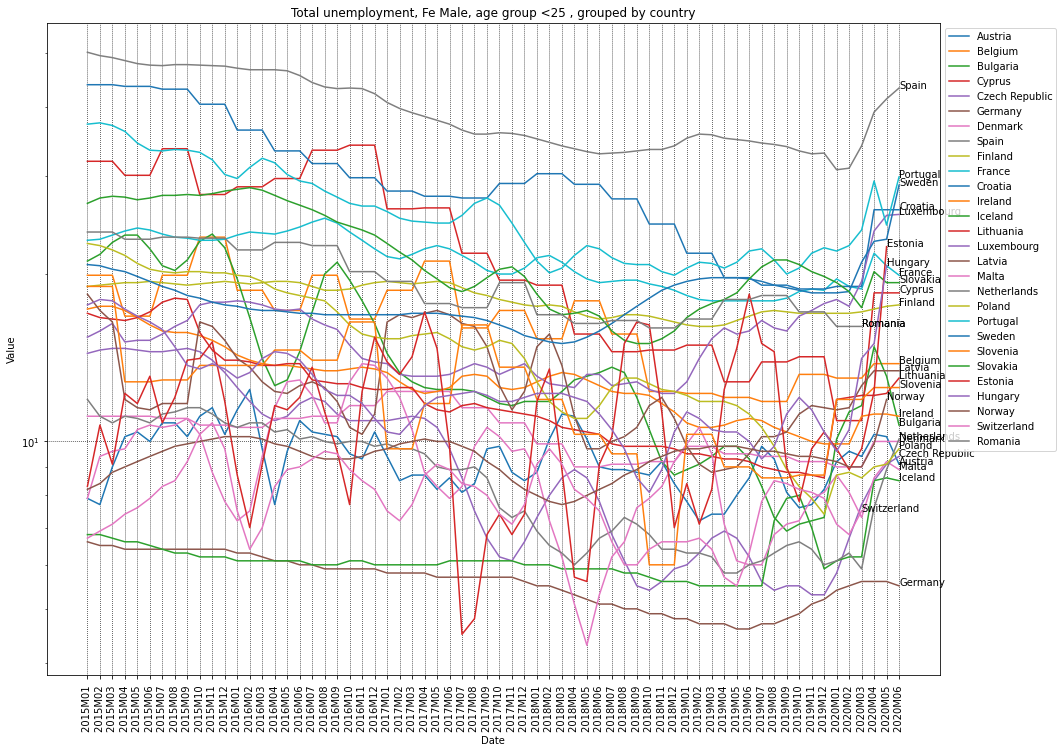

In [34]:
plot_time_variation(total_F_y25_df, size=4, is_log=True, title = "Fe Male, age group <25 ")

## Comparision W.R.T Age Group, Sex, Country

In [35]:
def plot_time_variation_age_sex(df_data_time, y='Value', country="Netherlands"):
    c_df = df_data_time.loc[(df_data_time.country==country)&(df_data_time.unit=='PC_ACT')&(df_data_time.s_adj=='TC')]
    f, ax = plt.subplots(1,1, figsize=(16,12))
    sns.lineplot(x="Date", y=y, data=c_df.loc[(c_df.age=='Y_LT25')&(c_df.sex=='F')],  label="Female, <25y")  
    sns.lineplot(x="Date", y=y, data=c_df.loc[(c_df.age=='Y_LT25')&(c_df.sex=='M')],  label="Male, <25y")  
    sns.lineplot(x="Date", y=y, data=c_df.loc[(c_df.age=='Y25-74')&(c_df.sex=='F')],  label="Female, 25-74y")  
    sns.lineplot(x="Date", y=y, data=c_df.loc[(c_df.age=='Y25-74')&(c_df.sex=='M')],  label="Male, <25-74y")  

    plt.xticks(rotation=90)
    plt.title(f'Total unemployment in {country}, grouped by age & sex')
    plt.legend(loc="upper left", bbox_to_anchor=(1,1))
    ax.grid(color='black', linestyle='dotted', linewidth=0.75)
    plt.show()

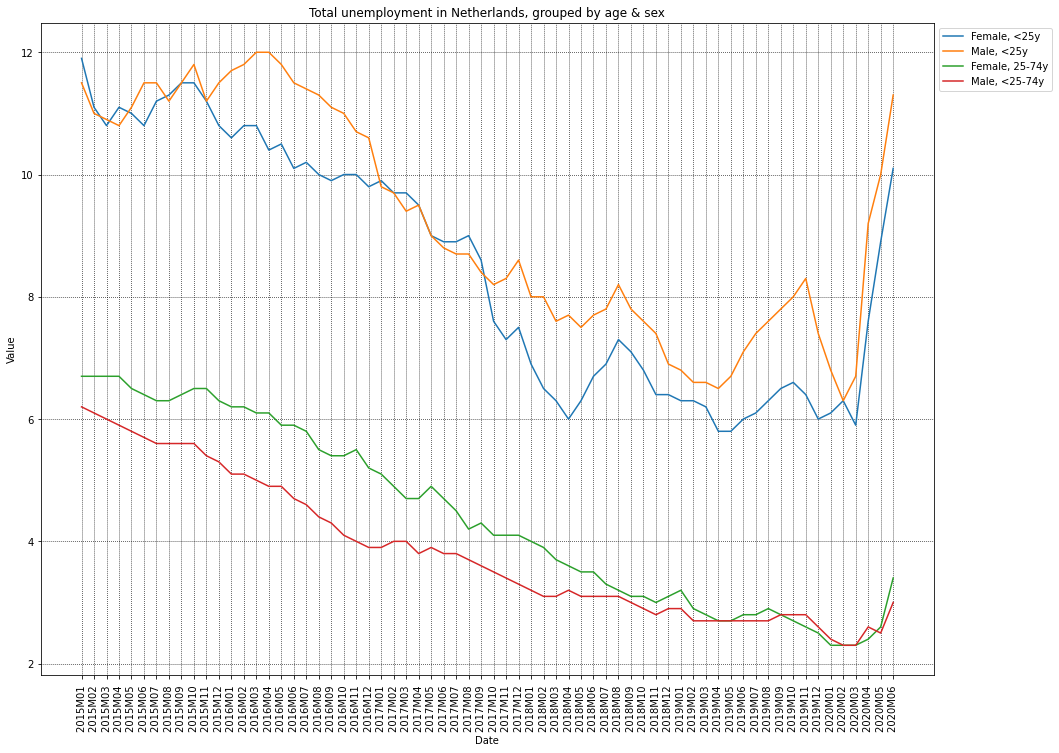

In [36]:
plot_time_variation_age_sex(df_data_time,country="Netherlands")

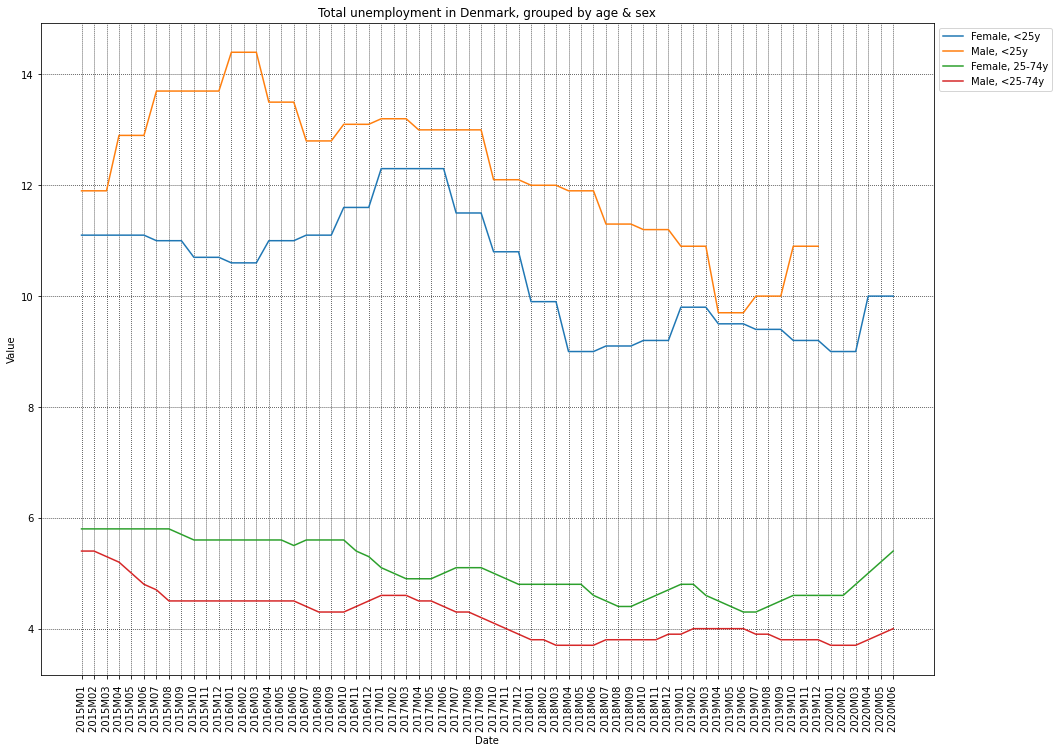

In [37]:
plot_time_variation_age_sex(df_data_time,country="Denmark")

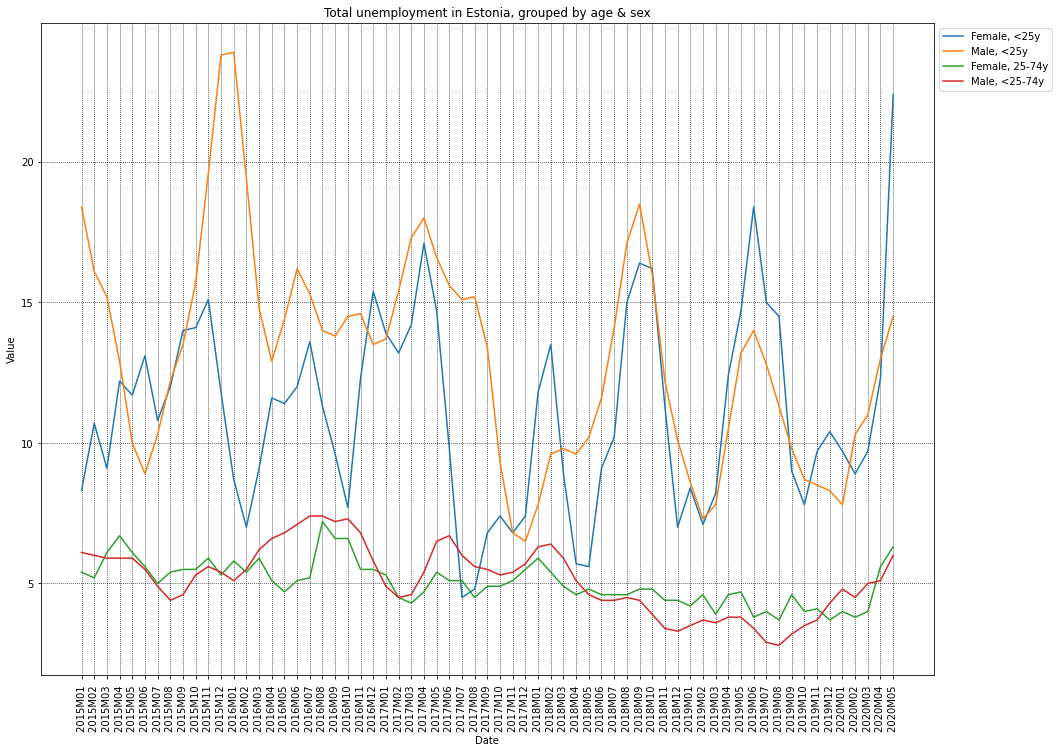

In [38]:
plot_time_variation_age_sex(df_data_time,country="Estonia")

In [39]:
import plotly.express as px

def plot_animated_map(dd_df, title):
    hover_text = []
    for index, row in dd_df.iterrows():
        hover_text.append((f"country: {row['country']}<br>unemployment: {row['Value']}%<br>country code: {row['iso']}"))
    dd_df['hover_text'] = hover_text

    fig = px.choropleth(dd_df, 
                        locations="C3",
                        hover_name='hover_text',
                        color="Value",
                        animation_frame="Date",
                        projection="natural earth",
                        color_continuous_scale=px.colors.sequential.Plasma,
                        width=600, height=600)
    fig.update_geos(   
        showcoastlines=True, coastlinecolor="DarkBlue",
        showland=True, landcolor="LightGrey",
        showocean=True, oceancolor="LightBlue",
        showlakes=True, lakecolor="Blue",
        showrivers=True, rivercolor="Blue",
        showcountries=True, countrycolor="DarkBlue"
    )
    fig.update_layout(title = title, geo_scope="europe")
    fig.show()

In [40]:
c_df = df_data_time.loc[(df_data_time.unit=='PC_ACT')&(df_data_time.s_adj=='TC')]
dd_df=c_df.loc[(c_df.age=='Y_LT25')&(c_df.sex=='F')]
dd_df = dd_df.sort_values(by='Date')
title = 'Percent of unemployed per country<br>Female, under 25 - (hover for details)'
plot_animated_map(dd_df, title)